In [34]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [5]:
!kaggle datasets download -d alaminbhuyan/mri-image-data

Dataset URL: https://www.kaggle.com/datasets/alaminbhuyan/mri-image-data
License(s): unknown
 94% 145M/154M [00:02<00:00, 61.8MB/s]
100% 154M/154M [00:02<00:00, 57.3MB/s]


In [6]:
!unzip \*.zip  && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0712.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0713.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0714.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0715.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0716.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0717.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0718.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0719.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0720.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0721.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0722.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0723.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0724.jpg  
  inflating: CleandMRIImageData/Training/glioma/Tr-gl_0725.jpg  
  inflating: CleandMRIImageData/Training/gl

In [13]:
import os

# Ana veri dizini
base_dir = '/content/CleandMRIImageData/Training'

# Sınıf dizinlerini listele
class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
print("Classes found:", class_dirs)

Classes found: ['pituitary', 'glioma', 'notumor', 'meningioma']


In [15]:
import shutil
from sklearn.model_selection import train_test_split

# Hedef dizin
output_base_dir = '/content/CleandMRIImageData/valid'
os.makedirs(output_base_dir, exist_ok=True)

# Belirli bir yüzde veya sayıda dosya seç
subset_ratio = 0.2  # %20'u almak için

for class_dir in class_dirs:
    # Sınıf dizinindeki dosyaları listele
    image_files = [f for f in os.listdir(os.path.join(base_dir, class_dir)) if f.endswith('.jpg')]

    # Belirli bir yüzde veya belirli sayıda dosya seç
    subset_size = int(len(image_files) * subset_ratio)
    image_subset, _ = train_test_split(image_files, train_size=subset_ratio, random_state=42)

    # Hedef sınıf dizinini oluştur
    output_class_dir = os.path.join(output_base_dir, class_dir)
    os.makedirs(output_class_dir, exist_ok=True)

    # Seçilen dosyaları kopyalayın
    for img_file in image_subset:
        src_path = os.path.join(base_dir, class_dir, img_file)
        dst_path = os.path.join(output_class_dir, img_file)
        shutil.copy(src_path, dst_path)

    print(f"{len(image_subset)} images from class '{class_dir}' have been copied to '{output_class_dir}'.")


291 images from class 'pituitary' have been copied to '/content/CleandMRIImageData/valid/pituitary'.
264 images from class 'glioma' have been copied to '/content/CleandMRIImageData/valid/glioma'.
319 images from class 'notumor' have been copied to '/content/CleandMRIImageData/valid/notumor'.
267 images from class 'meningioma' have been copied to '/content/CleandMRIImageData/valid/meningioma'.


In [16]:

#Verileri okutmak için path komutunu kullanıyoruz
train_dir = Path('/content/CleandMRIImageData/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/CleandMRIImageData/Testing')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/CleandMRIImageData/valid')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    #Veri setinde klasör adlarını kullanarak dataframemizi etiketliyoruz
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [17]:
# Etiketleme ve veri setini kontrol için basit veritabanı kodları kullanımı
print(f'Resim Sayısı: {train_df.shape[0]}\n')
print(f'Farklı Etiket Sayısı: {len(train_df.Label.unique())}\n')
print(f'Etiket İsimleri: {train_df.Label.unique()}')
train_df.head(5)

Resim Sayısı: 5712

Farklı Etiket Sayısı: 4

Etiket İsimleri: ['pituitary' 'notumor' 'glioma' 'meningioma']


,Filepath,Label
0,/content/CleandMRIImageData/Training/pituitary...,pituitary
1,/content/CleandMRIImageData/Training/pituitary...,pituitary
2,/content/CleandMRIImageData/Training/notumor/T...,notumor
3,/content/CleandMRIImageData/Training/notumor/T...,notumor
4,/content/CleandMRIImageData/Training/glioma/Tr...,glioma


In [18]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [19]:
pretrained_model = tf.keras.applications.MobileNetV2(
input_shape=(224, 224, 3),
include_top=False,
weights='imagenet',
pooling='avg'
)
pretrained_model.trainable = False

In [22]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True)])


Epoch 1/5
179/179 [==============================] - 279s 2s/step - loss: 0.4119 - accuracy: 0.8416 - val_loss: 0.3575 - val_accuracy: 0.8673
Epoch 2/5
179/179 [==============================] - 310s 2s/step - loss: 0.2298 - accuracy: 0.9130 - val_loss: 0.2707 - val_accuracy: 0.8993
Epoch 3/5
179/179 [==============================] - 269s 2s/step - loss: 0.1567 - accuracy: 0.9414 - val_loss: 0.2023 - val_accuracy: 0.9268
Epoch 4/5
179/179 [==============================] - 316s 2s/step - loss: 0.1230 - accuracy: 0.9548 - val_loss: 0.2331 - val_accuracy: 0.9146
Epoch 5/5
179/179 [==============================] - 268s 1s/step - loss: 0.0862 - accuracy: 0.9715 - val_loss: 0.2001 - val_accuracy: 0.9390


In [23]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Tahmin Doğruluk Oranı: {100*acc:.2f}%')

41/41 [==============================] - 51s 1s/step
Tahmin Doğruluk Oranı: 93.90%


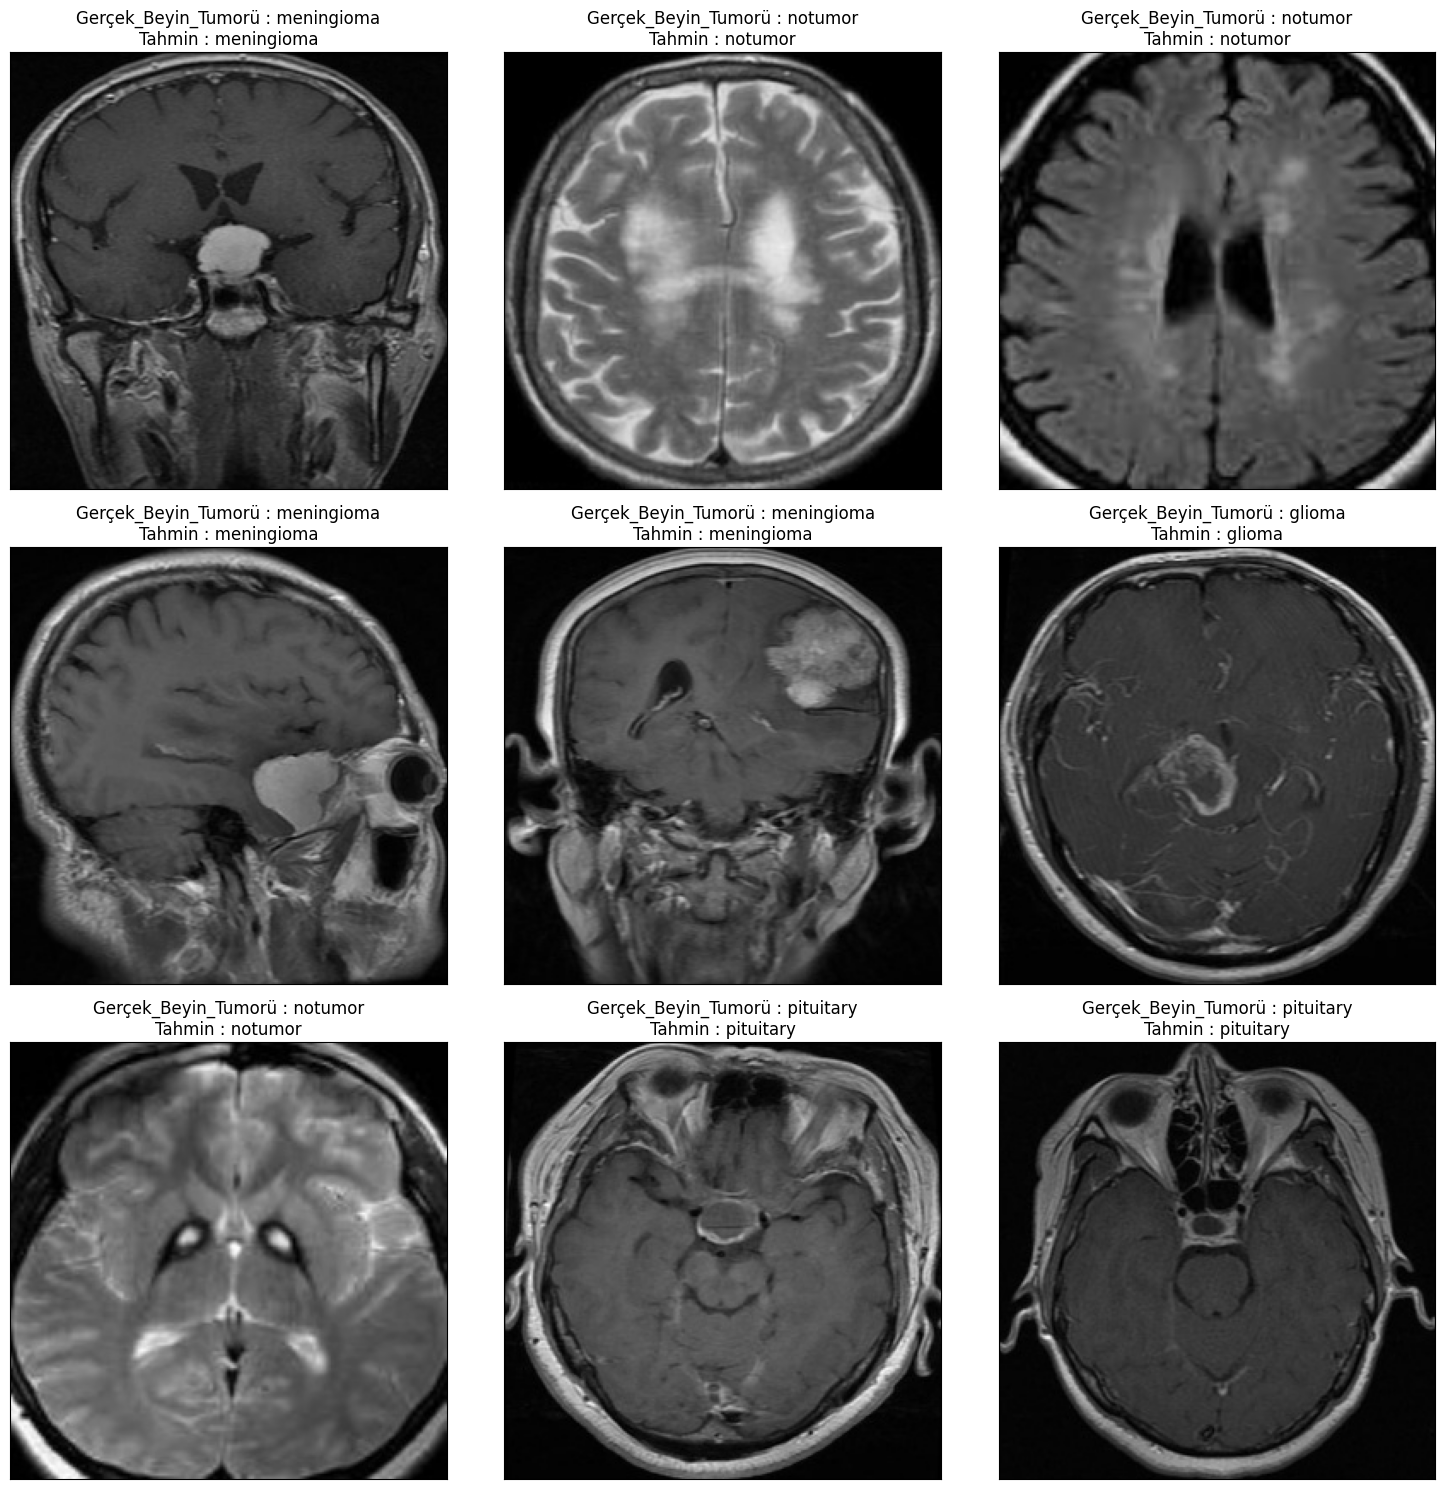

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"Gerçek_Beyin_Tumorü : {test_df.Label.iloc[i]}\nTahmin : {pred[i]}")
plt.tight_layout()
plt.show()